In [17]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig



In [18]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=6, n_classes=3, n_informative=3)

print(X.shape)

(1000, 6)


In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

fs = SelectKBest(score_func=f_classif, k=3)

X_selected = fs.fit_transform(X, y)

print(X_selected.shape)

(1000, 3)


In [20]:
print(fs.scores_)
print(fs.pvalues_)
print(fs.get_support())

[ 62.23735416 131.35979048  89.90051111   0.51604359 137.1089492
 166.26083016]
[3.38437726e-26 2.30678553e-51 1.27078620e-36 5.97036713e-01
 2.48809479e-53 4.86822854e-63]
[False  True False False  True  True]


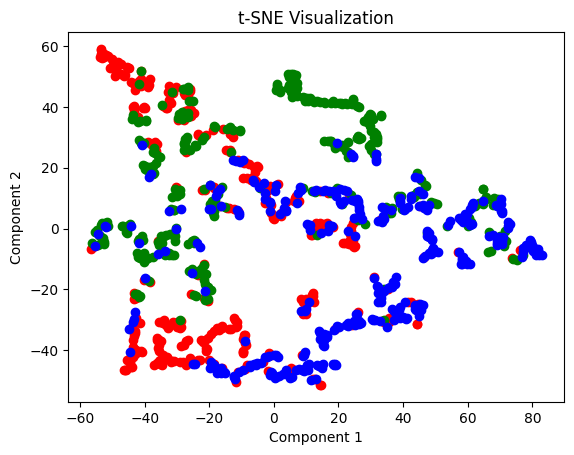

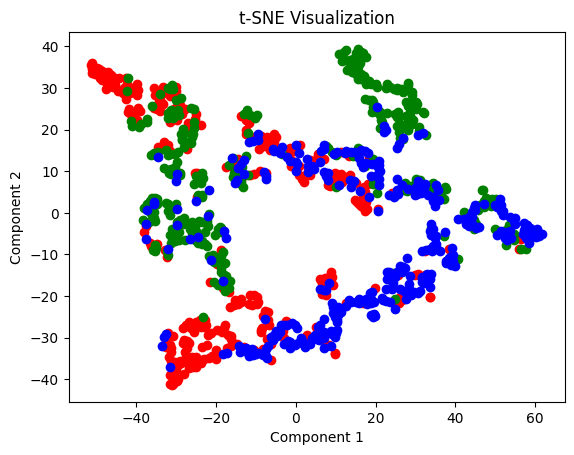

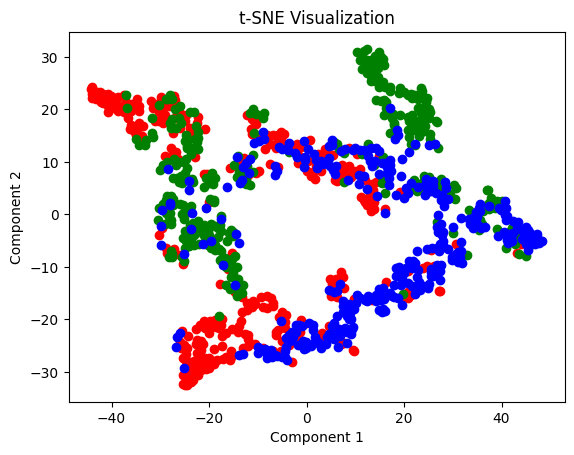

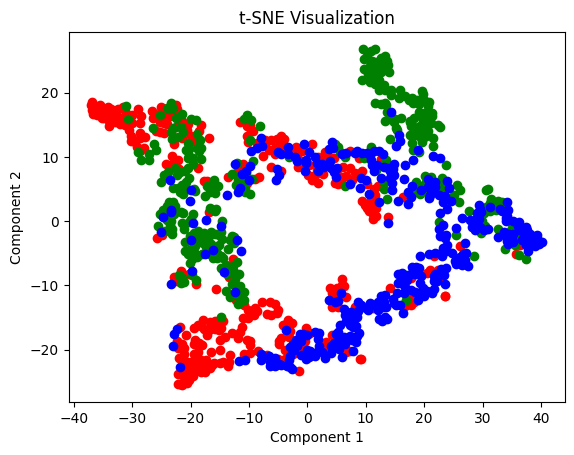

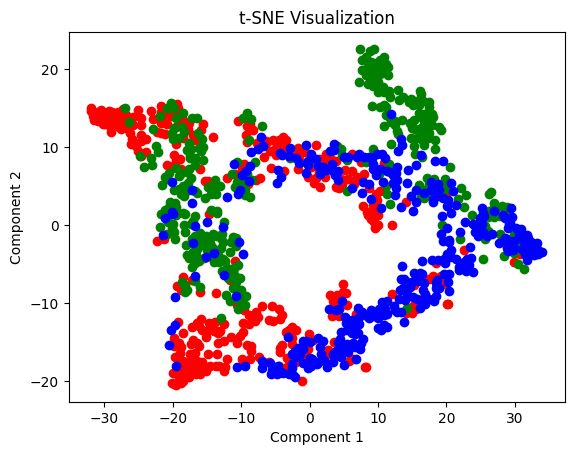

In [30]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt


for perplexity in range(10, 51, 10):
    # Применение t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity)
    X_embedded = tsne.fit_transform(X_selected)
    
    X_embedded_by_class = [[] for _ in range(3)]
    
    for i, row in enumerate(X_embedded):
        X_embedded_by_class[y[i]].append(row)
    
    # Визуализация
    plt.figure('t-SNE Visualization')
    plt.title('t-SNE Visualization')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    
    colors = ['r', 'g', 'b']
    for i, x in enumerate(X_embedded_by_class):
        x = array(x)
        plt.scatter(x[:, 0], x[:, 1], c=colors[i])
    
    plt.show()

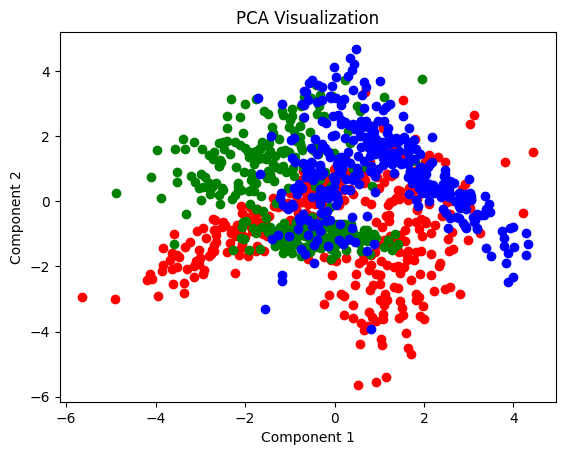

In [34]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_embedded = pca.fit_transform(X)

X_embedded_by_class = [[] for _ in range(3)]

for i, row in enumerate(X_embedded):
    X_embedded_by_class[y[i]].append(row)



# Визуализация
plt.figure('PCA Visualization')
plt.title('PCA Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

colors = ['r', 'g', 'b']
for i, x in enumerate(X_embedded_by_class):
    x = array(x)
    plt.scatter(x[:, 0], x[:, 1], c=colors[i])

plt.show()

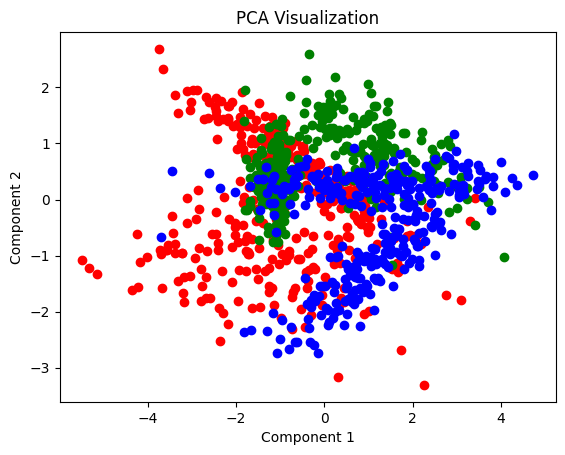

In [35]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_embedded = pca.fit_transform(X_selected)

X_embedded_by_class = [[] for _ in range(3)]

for i, row in enumerate(X_embedded):
    X_embedded_by_class[y[i]].append(row)



# Визуализация
plt.figure('PCA Visualization')
plt.title('PCA Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

colors = ['r', 'g', 'b']
for i, x in enumerate(X_embedded_by_class):
    x = array(x)
    plt.scatter(x[:, 0], x[:, 1], c=colors[i])

plt.show()